In [2]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.chrome.options import Options
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
import re
from time import sleep
warnings.filterwarnings("ignore")
sns.set_theme(style="white", palette="pastel")
print("Browse for more weather stations: https://www.wunderground.com/")

Browse for more weather stations: https://www.wunderground.com/


In [3]:
def load_data(start=str, end = str,url=str):
    url = re.sub("[0-9]", "", url).replace("-","")
    months = []
    for date in pd.date_range(start,end,freq="M"):
        month = date.strftime("%Y-%m")
        months.append(month.replace("-0","-"))
    all_df = pd.DataFrame()
    months_dict = dict.fromkeys(months)
    for key in months_dict.keys():
        print("Getting Weather Data for "+ key)
        url_final = url+key
        options = webdriver.ChromeOptions()
        options = Options()
        options.add_argument('--headless')
        options.add_argument('--disable-gpu') 
        driver = webdriver.Chrome("C:/Users/user/.wdm/drivers/chromedriver/win32/96.0.4664.45/chromedriver.exe",
                                  chrome_options=options)# ChromeDriverManager().install()
        try: 
            driver.get(url_final)
            tables = WebDriverWait(driver,20).until(EC.presence_of_all_elements_located((By.CSS_SELECTOR, "table")))

            newTable = pd.read_html(tables[0].get_attribute('outerHTML'))
            df = newTable[0]
            df = df.drop(["Polygon","Unnamed: 5_level_0"],axis=1)
            df.columns = ["Variable","Max","Average","Min"]
            months_dict[key] = df
        except:
            print("Could not load data for this month.")
            continue 
        #sleep(10)
    all_df = pd.concat(months_dict)
    new_index = []
    for date in all_df.index.get_level_values(0):
        new_index.append(pd.Timestamp(date).date())
    all_df.index = new_index
    ids = url.split("/")[5:7]
    print("Done. Saving as: "+end+"_"+ids[0]+"_"+ids[1]+".csv")
    all_df.to_csv(end+"_"+ids[0]+"_"+ids[1]+".csv")
    return all_df 

def data_for_boxplot(all_df, variable=str, statistic=str, scaler = float, to_C = True):
    var_df = all_df[all_df["Variable"]==variable]
    if to_C ==True:
        var_df = var_df.drop("Variable",axis=1)
        var_df = round((var_df-32)*5/9,2)
    else:
        var_df = var_df.drop("Variable",axis=1)*scaler
    var_df["Month"] = pd.DatetimeIndex(var_df.index).month
    melt_df = pd.melt(var_df,id_vars = "Month",value_vars=statistic,value_name=statistic)
    return melt_df

def make_standard_charts(all_df,title):
    fig,axs = plt.subplots(2,1,sharex=False,figsize=(8,8))
    plt.suptitle(title, fontweight="bold")
    #Temperature
    temp_ax=axs[0]
    statistic="Min"
    chart_df = data_for_boxplot(all_df, variable="Avg Temperature",statistic=statistic, to_C=True)
    sns.boxplot(x = "Month",y=statistic,data=chart_df,ax=temp_ax)
    statistic = "Max"
    chart_df = data_for_boxplot(all_df, variable="Avg Temperature",statistic=statistic, to_C=True)
    sns.boxplot(x = "Month",y=statistic,data=chart_df,ax = temp_ax).set(
        ylabel='Temperature',title='Min and Max Temperatures in Degrees Celsius by Month')
    #Wind
    wind_ax=axs[1]
    statistic = "Max"
    chart_df = data_for_boxplot(all_df, variable="Wind",statistic=statistic, to_C=False,scaler=0.868976)
    sns.boxplot(x = "Month",y=statistic,showfliers = False,ax=wind_ax,data=chart_df).set_title(statistic+" Wind Speed in Knots by Month");
    statistic = "Average"
    chart_df = data_for_boxplot(all_df, variable="Wind",statistic=statistic, to_C=False,scaler=0.868976)
    sns.boxplot(x = "Month",y=statistic,showfliers = False,ax=wind_ax,data=chart_df).set(ylabel="Wind Speed",title="Average and Max Wind Speed in Knots by Month");
    #sns.swarmplot(x = "Month",y=statistic,showfliers = False,data=chart_df, color = "0.25",size=3);
    plt.tight_layout()

In [160]:
statistic = "Max"
start="2010-11-30"
end = "2021-12-31"

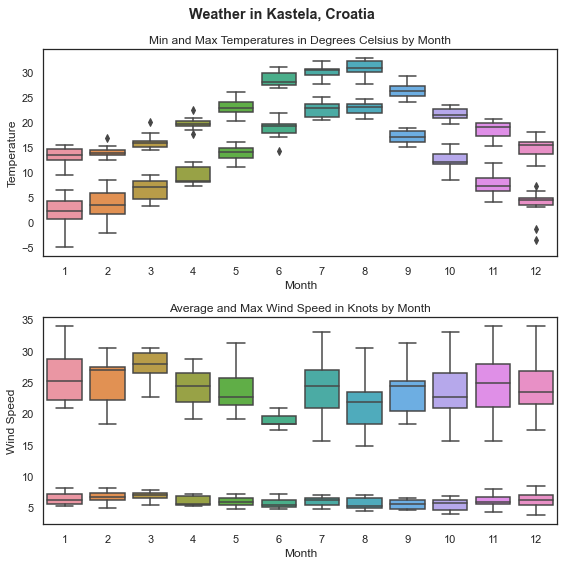

In [187]:
croatia_df = load_data(start=start, end = end,
                       url = "https://www.wunderground.com/history/monthly/hr/kastela/LDSP/date/2020-11")
make_standard_charts(croatia_df, "Weather in Kastela, Croatia")

In [18]:
corfu_df.loc[corfu_df.Max>100,"Max"] = corfu_df.Max.mean()

Series([], Name: Max, dtype: float64)

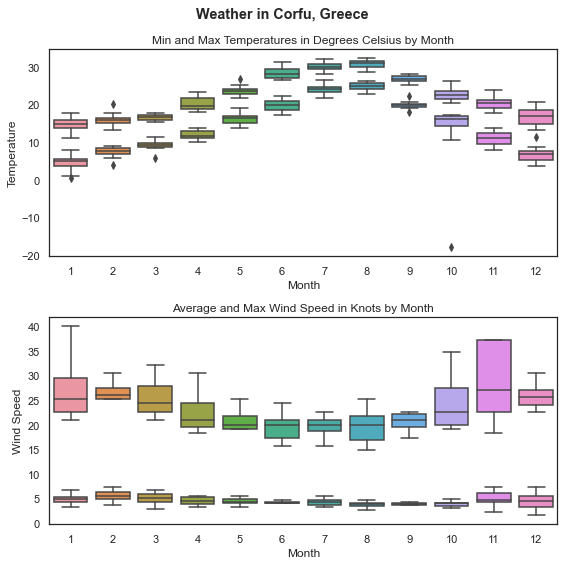

In [20]:
corfu_df = pd.read_csv("2021-12-31_gr_corfu.csv",   index_col=0)
corfu_df.loc[corfu_df.Max>100,"Max"] = corfu_df.Max.mean()
make_standard_charts(corfu_df, "Weather in Corfu, Greece")

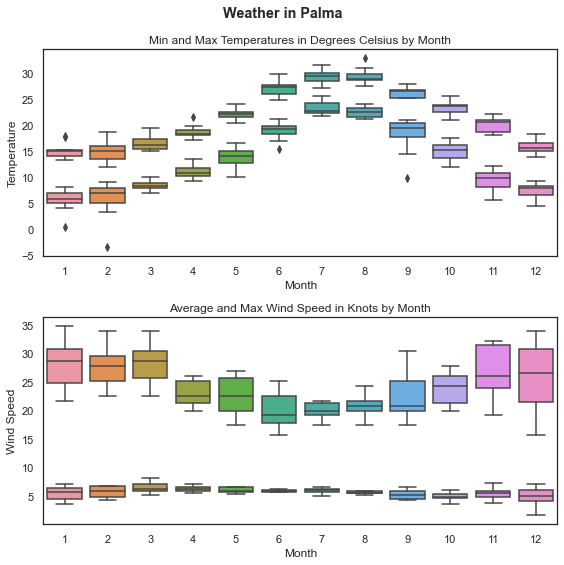

In [186]:
palma_df = load_data(start=start, end = end,
                     url = "https://www.wunderground.com/history/monthly/es/palma/LEPA/date/2013-12")
make_standard_charts(palma_df, "Weather in Palma")

Getting Weather Data for 2010-11
Getting Weather Data for 2010-12
Getting Weather Data for 2011-1
Getting Weather Data for 2011-2
Getting Weather Data for 2011-3
Getting Weather Data for 2011-4
Getting Weather Data for 2011-5
Getting Weather Data for 2011-6
Getting Weather Data for 2011-7
Getting Weather Data for 2011-8
Getting Weather Data for 2011-9
Getting Weather Data for 2011-10
Getting Weather Data for 2011-11
Getting Weather Data for 2011-12
Getting Weather Data for 2012-1
Getting Weather Data for 2012-2
Getting Weather Data for 2012-3
Getting Weather Data for 2012-4
Getting Weather Data for 2012-5
Getting Weather Data for 2012-6
Getting Weather Data for 2012-7
Getting Weather Data for 2012-8
Getting Weather Data for 2012-9
Getting Weather Data for 2012-10
Getting Weather Data for 2012-11
Getting Weather Data for 2012-12
Getting Weather Data for 2013-1
Getting Weather Data for 2013-2
Getting Weather Data for 2013-3
Getting Weather Data for 2013-4
Getting Weather Data for 2013-5


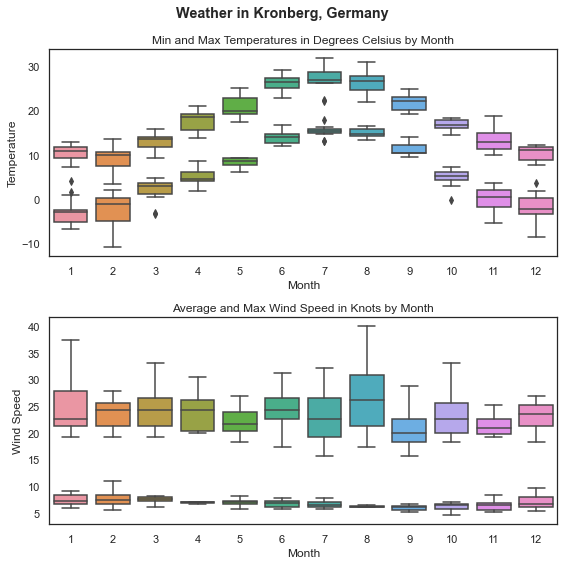

In [188]:
kroni_df = load_data(start=start, end = end,
                     url = "https://www.wunderground.com/history/monthly/de/frankfurt/EDDF/date/2021-4")
make_standard_charts(kroni_df,"Weather in Kronberg, Germany")